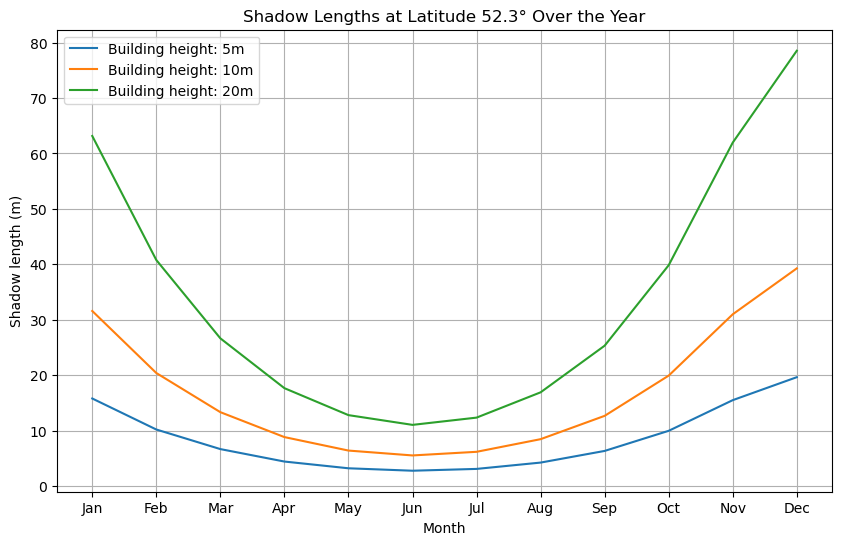

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate solar declination (simplified for 21st of each month)
def solar_declination(day_of_year):
    return 23.44 * np.sin(np.radians(360 / 365 * (day_of_year - 81)))

# Function to calculate zenith angle
def solar_zenith_angle(latitude, declination):
    return np.abs(latitude - declination)

# Function to calculate shadow length for a given height and zenith angle
def shadow_length(height, zenith_angle):
    return height * np.tan(np.radians(zenith_angle))

# Main function to plot shadow length over the year
def plot_shadow_lengths(latitude, building_heights):
    # Days of the year for the 21st of each month
    days_of_year = [21, 51, 79, 109, 139, 170, 201, 232, 262, 292, 322, 352]
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    # Prepare to store shadow lengths for each building
    shadow_lengths = {height: [] for height in building_heights}

    # Loop through each month and calculate shadow lengths
    for day in days_of_year:
        declination = solar_declination(day)
        zenith_angle = solar_zenith_angle(latitude, declination)

        for height in building_heights:
            length = shadow_length(height, zenith_angle)
            shadow_lengths[height].append(length)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    
    for height, lengths in shadow_lengths.items():
        plt.plot(months, lengths, label=f'Building height: {height}m')
    
    plt.xlabel('Month')
    plt.ylabel('Shadow length (m)')
    plt.title(f'Shadow Lengths at Latitude {latitude}° Over the Year')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
latitude = 52.3  # Amsterdam's latitude
building_heights = [5, 10, 20]  # List of building heights in meters
plot_shadow_lengths(latitude, building_heights)

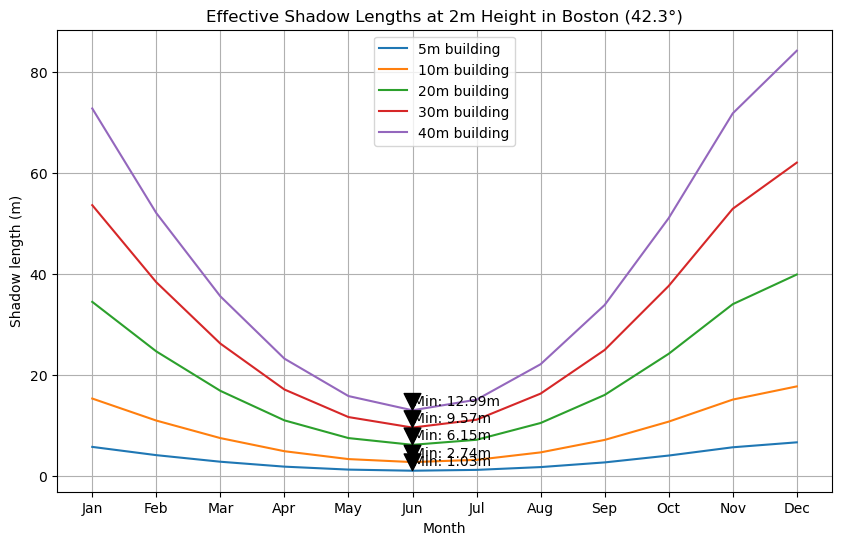

In [28]:
# Example usage
latitude = 42.3  # Amsterdam's latitude
building_heights = [5, 10, 20, 30, 40]  # List of building heights in meters
city = 'Boston'
plot_shadow_lengths_with_2m(latitude, building_heights, city, label_min=True)

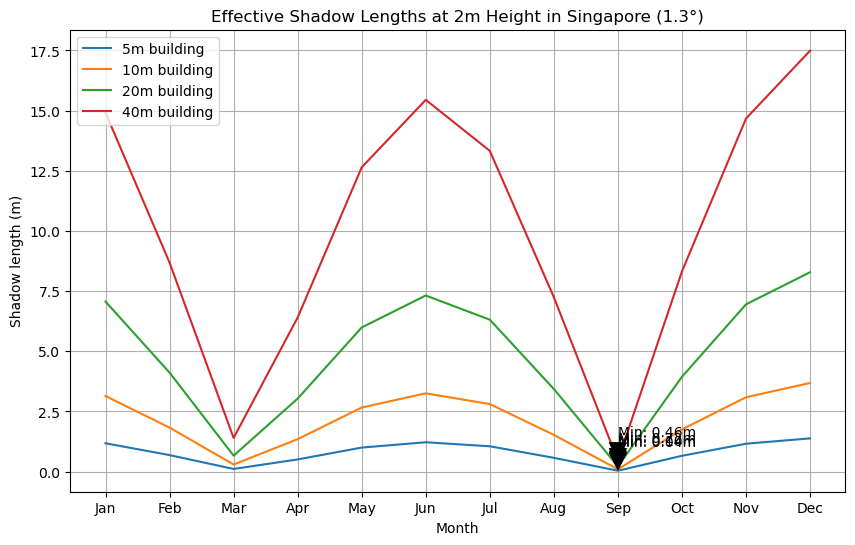

In [20]:
# Example usage
latitude = 1.3  # Amsterdam's latitude
building_heights = [5, 10, 20, 40]  # List of building heights in meters
city = 'Singapore'
plot_shadow_lengths_with_2m(latitude, building_heights, city, label_min=True)

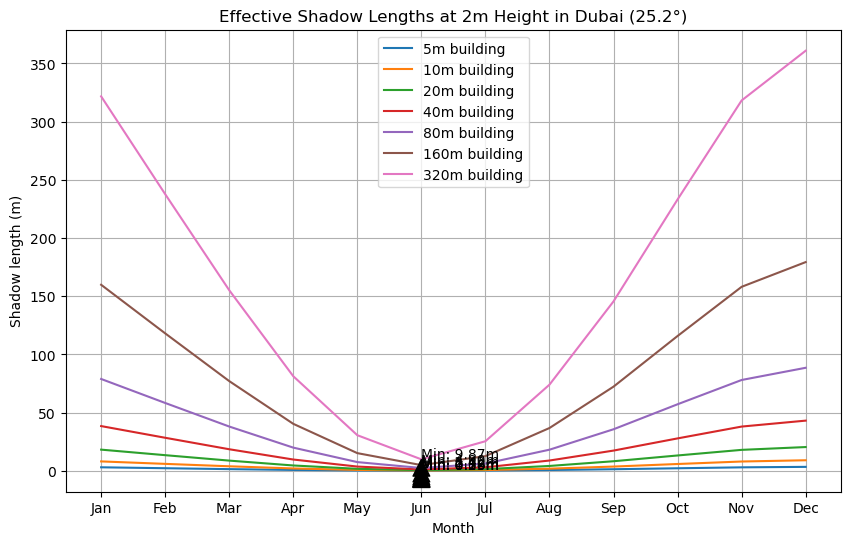

In [25]:
# Example usage
latitude = 25.2  # Amsterdam's latitude
building_heights = [5, 10, 20, 40, 80, 160, 320]  # List of building heights in meters
city = 'Dubai'
plot_shadow_lengths_with_2m(latitude, building_heights, city, label_min=True)

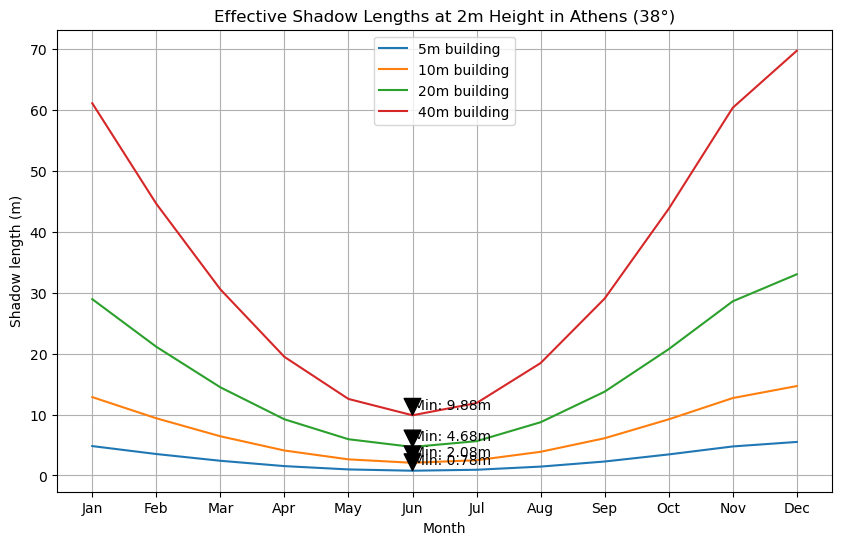

In [16]:
# Example usage
latitude = 38  # Amsterdam's latitude
building_heights = [5, 10, 20, 40]  # List of building heights in meters
city = 'Athens'
plot_shadow_lengths_with_2m(latitude, building_heights, city, label_min=True)

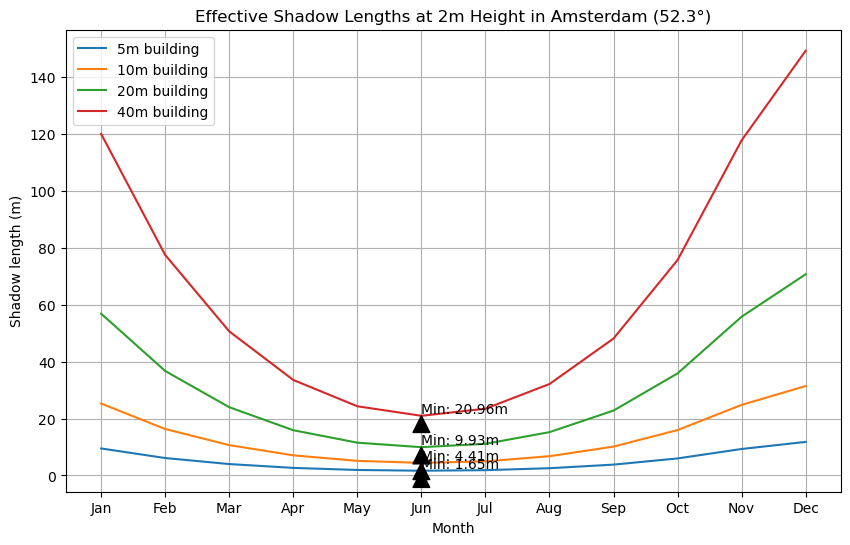

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate solar declination (simplified for 21st of each month)
def solar_declination(day_of_year):
    return 23.44 * np.sin(np.radians(360 / 365 * (day_of_year - 81)))

# Function to calculate zenith angle
def solar_zenith_angle(latitude, declination):
    return np.abs(latitude - declination)

# Function to calculate shadow length for a given height and zenith angle
def shadow_length(height, zenith_angle):
    return height * np.tan(np.radians(zenith_angle))

# Main function to plot shadow length over the year with an option to label the minimum value
def plot_shadow_lengths_with_2m(latitude, building_heights, city, label_min=False):
    # Days of the year for the 21st of each month
    days_of_year = [21, 51, 79, 109, 139, 170, 201, 232, 262, 292, 322, 352]
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    person_height = 2  # Fixed height of the person/object for comparison
    shadow_lengths = {height: [] for height in building_heights}
    effective_shadow_lengths = {height: [] for height in building_heights}

    # Loop through each month and calculate shadow lengths
    for day in days_of_year:
        declination = solar_declination(day)
        zenith_angle = solar_zenith_angle(latitude, declination)

        # Calculate shadow lengths for each building height
        for height in building_heights:
            building_shadow = shadow_length(height, zenith_angle)
            person_shadow = shadow_length(person_height, zenith_angle)

            # Effective shadow length beyond 2m
            effective_shadow = max(0, building_shadow - person_shadow)  # No negative shadow
            shadow_lengths[height].append(building_shadow)
            effective_shadow_lengths[height].append(effective_shadow)
    
    # Plot the results
    plt.figure(figsize=(10, 6))

    # Plot shadow lengths for building heights and effective shadow lengths at 2m
    for height in building_heights:
        plt.plot(months, effective_shadow_lengths[height], label=f'{height}m building')
        
        # Label the minimum shadow length if label_min is True
        if label_min:
            min_length = min(effective_shadow_lengths[height])
            min_month_index = effective_shadow_lengths[height].index(min_length)
            min_month = months[min_month_index]
            
            # Add annotation for the minimum shadow length
            plt.annotate(f'Min: {min_length:.2f}m', 
                         xy=(min_month_index, min_length), 
                         xytext=(min_month_index, min_length + 1),
                         arrowprops=dict(facecolor='black', shrink=0.05))
    
    plt.xlabel('Month')
    plt.ylabel('Shadow length (m)')
    plt.title(f'Effective Shadow Lengths at 2m Height in {city} ({latitude}°)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
latitude = 52.3  # Amsterdam's latitude
building_heights = [5, 10, 20, 40]  # List of building heights in meters
city = 'Amsterdam'

# Call the function with label_min=True to display minimum values
plot_shadow_lengths_with_2m(latitude, building_heights, city, label_min=True)

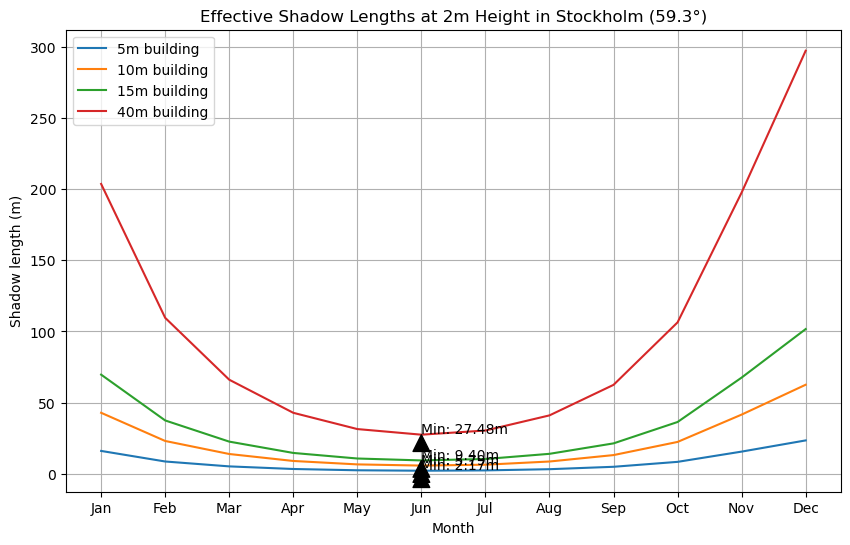

In [27]:
# Example usage
latitude = 59.3  # Amsterdam's latitude
building_heights = [5, 10, 15, 40]  # List of building heights in meters
city = 'Stockholm'
plot_shadow_lengths_with_2m(latitude, building_heights, city, label_min=True)

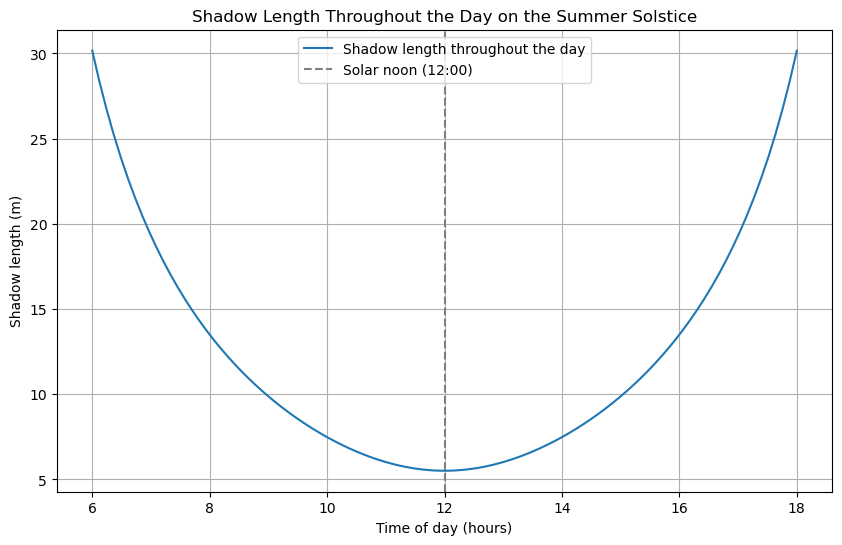

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
latitude = 52.3  # Latitude for Amsterdam
declination = 23.44  # Solar declination for the summer solstice (degrees)
building_height = 10  # Building height in meters

# Function to calculate the solar zenith angle
def solar_zenith_angle(latitude, declination, hour_angle):
    return np.degrees(np.arccos(
        np.sin(np.radians(latitude)) * np.sin(np.radians(declination)) +
        np.cos(np.radians(latitude)) * np.cos(np.radians(declination)) * np.cos(np.radians(hour_angle))
    ))

# Function to calculate shadow length
def shadow_length(height, zenith_angle):
    return height * np.tan(np.radians(zenith_angle))

# Time range for the day: -6 to 6 hours from solar noon (from 6 AM to 6 PM)
hours_from_noon = np.linspace(-6, 6, 100)  # 6 AM to 6 PM
hour_angles = 15 * hours_from_noon  # Hour angle = 15 degrees per hour

# Calculate zenith angles and shadow lengths throughout the day
zenith_angles = solar_zenith_angle(latitude, declination, hour_angles)
shadow_lengths = shadow_length(building_height, zenith_angles)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hours_from_noon + 12, shadow_lengths, label='Shadow length throughout the day')
plt.xlabel('Time of day (hours)')
plt.ylabel('Shadow length (m)')
plt.title('Shadow Length Throughout the Day on the Summer Solstice')
plt.axvline(12, color='gray', linestyle='--', label='Solar noon (12:00)')
plt.legend()
plt.grid(True)
plt.show()

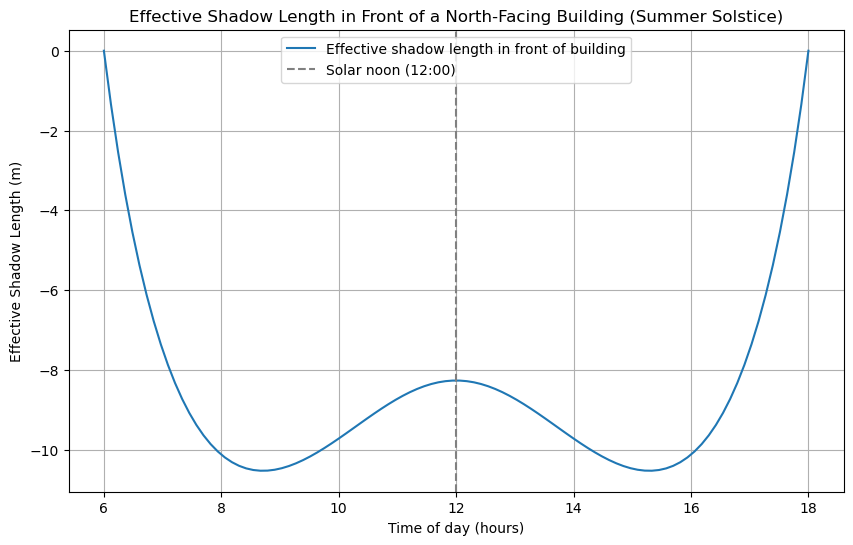

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
latitude = 52.3  # Latitude for Amsterdam
declination = 23.44  # Solar declination for the summer solstice (degrees)
building_height = 15  # Building height in meters
building_orientation = 0  # South-facing facade (in degrees)

# Function to calculate the solar zenith angle
def solar_zenith_angle(latitude, declination, hour_angle):
    return np.degrees(np.arccos(
        np.sin(np.radians(latitude)) * np.sin(np.radians(declination)) +
        np.cos(np.radians(latitude)) * np.cos(np.radians(declination)) * np.cos(np.radians(hour_angle))
    ))

# Function to calculate the solar azimuth angle (adjusted to handle arrays)
def solar_azimuth_angle(hour_angle):
    # At solar noon (hour_angle = 0), the sun is due south (180 degrees).
    # Before solar noon (morning), the sun rises in the east and moves towards south (90° to 180°).
    # After solar noon (afternoon), the sun moves towards the west (180° to 270°).
    return np.where(hour_angle < 0, 180 + hour_angle, 180 + hour_angle)

# Function to calculate shadow length
def shadow_length(height, zenith_angle):
    return height * np.tan(np.radians(zenith_angle))

# Time range for the day: -6 to 6 hours from solar noon (from 6 AM to 6 PM)
hours_from_noon = np.linspace(-6, 6, 100)  # 6 AM to 6 PM
hour_angles = 15 * hours_from_noon  # Hour angle = 15 degrees per hour

# Calculate zenith angles, azimuth angles, and shadow lengths throughout the day
zenith_angles = solar_zenith_angle(latitude, declination, hour_angles)
shadow_lengths = shadow_length(building_height, zenith_angles)

# Calculate azimuth angles
azimuth_angles = solar_azimuth_angle(hour_angles)

# Calculate the effective shadow length in front of the building
effective_shadow_lengths = shadow_lengths * np.cos(np.radians(azimuth_angles - building_orientation))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hours_from_noon + 12, effective_shadow_lengths, label='Effective shadow length in front of building')
plt.xlabel('Time of day (hours)')
plt.ylabel('Effective Shadow Length (m)')
plt.title('Effective Shadow Length in Front of a North-Facing Building (Summer Solstice)')
plt.axvline(12, color='gray', linestyle='--', label='Solar noon (12:00)')
plt.legend()
plt.grid(True)
plt.show()

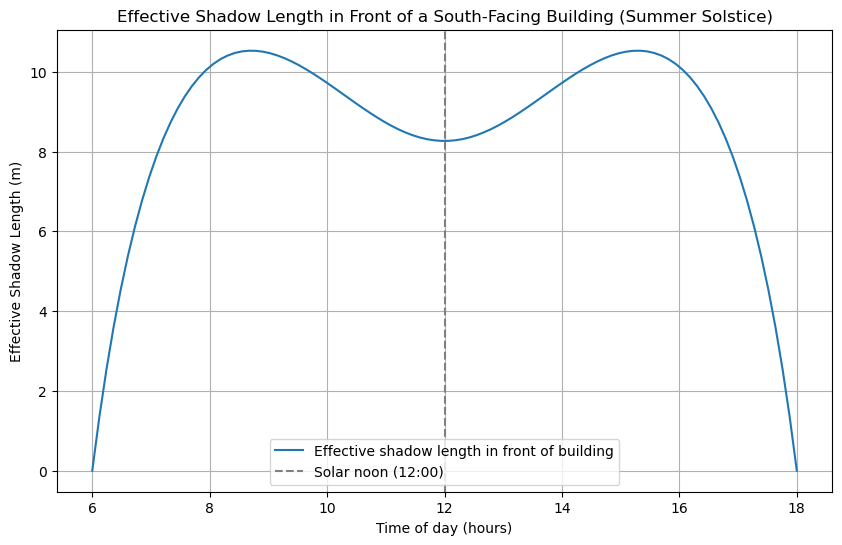

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
latitude = 52.3  # Latitude for Amsterdam
declination = 23.44  # Solar declination for the summer solstice (degrees)
building_height = 15  # Building height in meters
building_orientation = 180  # South-facing facade (in degrees)

# Function to calculate the solar zenith angle
def solar_zenith_angle(latitude, declination, hour_angle):
    return np.degrees(np.arccos(
        np.sin(np.radians(latitude)) * np.sin(np.radians(declination)) +
        np.cos(np.radians(latitude)) * np.cos(np.radians(declination)) * np.cos(np.radians(hour_angle))
    ))

# Function to calculate the solar azimuth angle (adjusted to handle arrays)
def solar_azimuth_angle(hour_angle):
    # At solar noon (hour_angle = 0), the sun is due south (180 degrees).
    # Before solar noon (morning), the sun rises in the east and moves towards south (90° to 180°).
    # After solar noon (afternoon), the sun moves towards the west (180° to 270°).
    return np.where(hour_angle < 0, 180 + hour_angle, 180 + hour_angle)

# Function to calculate shadow length
def shadow_length(height, zenith_angle):
    return height * np.tan(np.radians(zenith_angle))

# Time range for the day: -6 to 6 hours from solar noon (from 6 AM to 6 PM)
hours_from_noon = np.linspace(-6, 6, 100)  # 6 AM to 6 PM
hour_angles = 15 * hours_from_noon  # Hour angle = 15 degrees per hour

# Calculate zenith angles, azimuth angles, and shadow lengths throughout the day
zenith_angles = solar_zenith_angle(latitude, declination, hour_angles)
shadow_lengths = shadow_length(building_height, zenith_angles)

# Calculate azimuth angles
azimuth_angles = solar_azimuth_angle(hour_angles)

# Calculate the effective shadow length in front of the building
effective_shadow_lengths = shadow_lengths * np.cos(np.radians(azimuth_angles - building_orientation))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(hours_from_noon + 12, effective_shadow_lengths, label='Effective shadow length in front of building')
plt.xlabel('Time of day (hours)')
plt.ylabel('Effective Shadow Length (m)')
plt.title('Effective Shadow Length in Front of a South-Facing Building (Summer Solstice)')
plt.axvline(12, color='gray', linestyle='--', label='Solar noon (12:00)')
plt.legend()
plt.grid(True)
plt.show()

#### NOT WORKING EXPERIMENTS

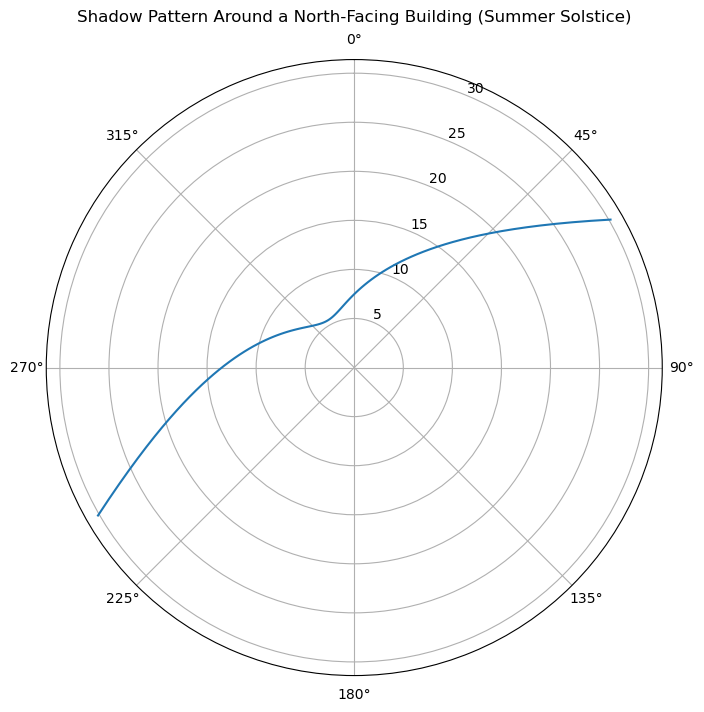

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
latitude = 52.3  # Latitude for Amsterdam
declination = 23.44  # Solar declination for the summer solstice (degrees)
building_height = 10  # Building height in meters
building_orientation = 30  # North-facing facade (in degrees)

# Function to calculate the solar zenith angle
def solar_zenith_angle(latitude, declination, hour_angle):
    return np.degrees(np.arccos(
        np.sin(np.radians(latitude)) * np.sin(np.radians(declination)) +
        np.cos(np.radians(latitude)) * np.cos(np.radians(declination)) * np.cos(np.radians(hour_angle))
    ))

# Function to calculate the solar azimuth angle (simplified for morning and afternoon)
def solar_azimuth_angle(hour_angle):
    return 180 + hour_angle  # Sun moves from east (90°) to west (270°) throughout the day

# Function to calculate shadow length based on the zenith angle
def shadow_length(height, zenith_angle):
    return height * np.tan(np.radians(zenith_angle))

# Time range for the day: -6 to 6 hours from solar noon (from 6 AM to 6 PM)
hours_from_noon = np.linspace(-6, 6, 100)  # 6 AM to 6 PM
hour_angles = 15 * hours_from_noon  # Hour angle = 15 degrees per hour

# Calculate zenith angles and shadow lengths
zenith_angles = solar_zenith_angle(latitude, declination, hour_angles)
shadow_lengths = shadow_length(building_height, zenith_angles)

# Calculate solar azimuth angles
azimuth_angles = solar_azimuth_angle(hour_angles)

# Calculate shadow azimuth direction (opposite of the solar azimuth angle)
shadow_azimuth_angles = (azimuth_angles + 180) % 360  # Mod to keep it in 0-360° range

# Adjust the shadow direction based on the building orientation (north-facing = 0 degrees)
adjusted_shadow_azimuth = (shadow_azimuth_angles - building_orientation) % 360

# Convert azimuth angles to radians for polar plot
shadow_azimuth_radians = np.radians(adjusted_shadow_azimuth)

# Polar plot of shadow direction and length
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')  # North-facing building (0 degrees = north)
ax.set_theta_direction(-1)  # Clockwise direction

# Plot shadow lengths with respect to adjusted azimuth angles
ax.plot(shadow_azimuth_radians, shadow_lengths)

ax.set_title('Shadow Pattern Around a North-Facing Building (Summer Solstice)', va='bottom')
plt.show()

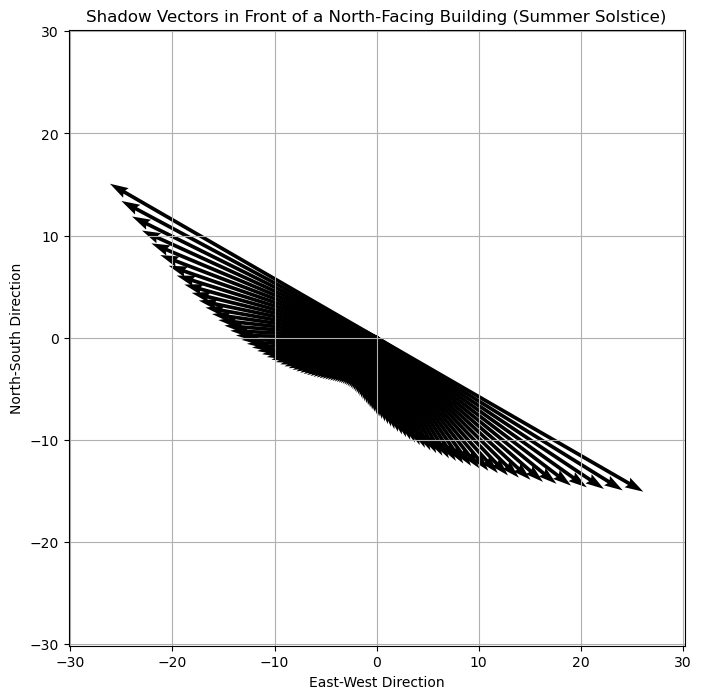

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
latitude = 52.3  # Latitude for Amsterdam
declination = 23.44  # Solar declination for the summer solstice (degrees)
building_height = 10  # Building height in meters
building_orientation = 150  # North-facing facade (in degrees)

# Function to calculate the solar zenith angle
def solar_zenith_angle(latitude, declination, hour_angle):
    return np.degrees(np.arccos(
        np.sin(np.radians(latitude)) * np.sin(np.radians(declination)) +
        np.cos(np.radians(latitude)) * np.cos(np.radians(declination)) * np.cos(np.radians(hour_angle))
    ))

# Function to calculate the solar azimuth angle
def solar_azimuth_angle(hour_angle):
    return 180 + hour_angle  # Simplified for morning and afternoon

# Function to calculate shadow length
def shadow_length(height, zenith_angle):
    return height * np.tan(np.radians(zenith_angle))

# Time range for the day: -6 to 6 hours from solar noon (from 6 AM to 6 PM)
hours_from_noon = np.linspace(-6, 6, 100)  # 6 AM to 6 PM
hour_angles = 15 * hours_from_noon  # Hour angle = 15 degrees per hour

# Calculate zenith angles and shadow lengths
zenith_angles = solar_zenith_angle(latitude, declination, hour_angles)
shadow_lengths = shadow_length(building_height, zenith_angles)

# Calculate azimuth angles
azimuth_angles = solar_azimuth_angle(hour_angles)

# Calculate shadow azimuth direction (opposite of the solar azimuth angle)
shadow_azimuth_angles = (azimuth_angles + 180) % 360  # Mod to keep it in 0-360° range

# Adjust the shadow direction based on the building orientation (north-facing = 0 degrees)
adjusted_shadow_azimuth = (shadow_azimuth_angles - building_orientation) % 360

# Convert azimuth angles to radians for calculations
shadow_azimuth_radians = np.radians(adjusted_shadow_azimuth)

# Calculate the x and y components of the shadow vectors
shadow_x = shadow_lengths * np.sin(shadow_azimuth_radians)
shadow_y = shadow_lengths * np.cos(shadow_azimuth_radians)

# Quiver plot of shadow vectors
plt.figure(figsize=(8, 8))
plt.quiver(np.zeros_like(shadow_x), np.zeros_like(shadow_y), shadow_x, shadow_y, angles='xy', scale_units='xy', scale=1)
plt.xlim([-max(shadow_lengths), max(shadow_lengths)])
plt.ylim([-max(shadow_lengths), max(shadow_lengths)])
plt.title('Shadow Vectors in Front of a North-Facing Building (Summer Solstice)')
plt.xlabel('East-West Direction')
plt.ylabel('North-South Direction')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()